# Проект: Обучение с учителем: качество модели

## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

Вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## План решения задачи

Представим группы признаков (вместе с целевым) в виде диаграммы Исикавы.

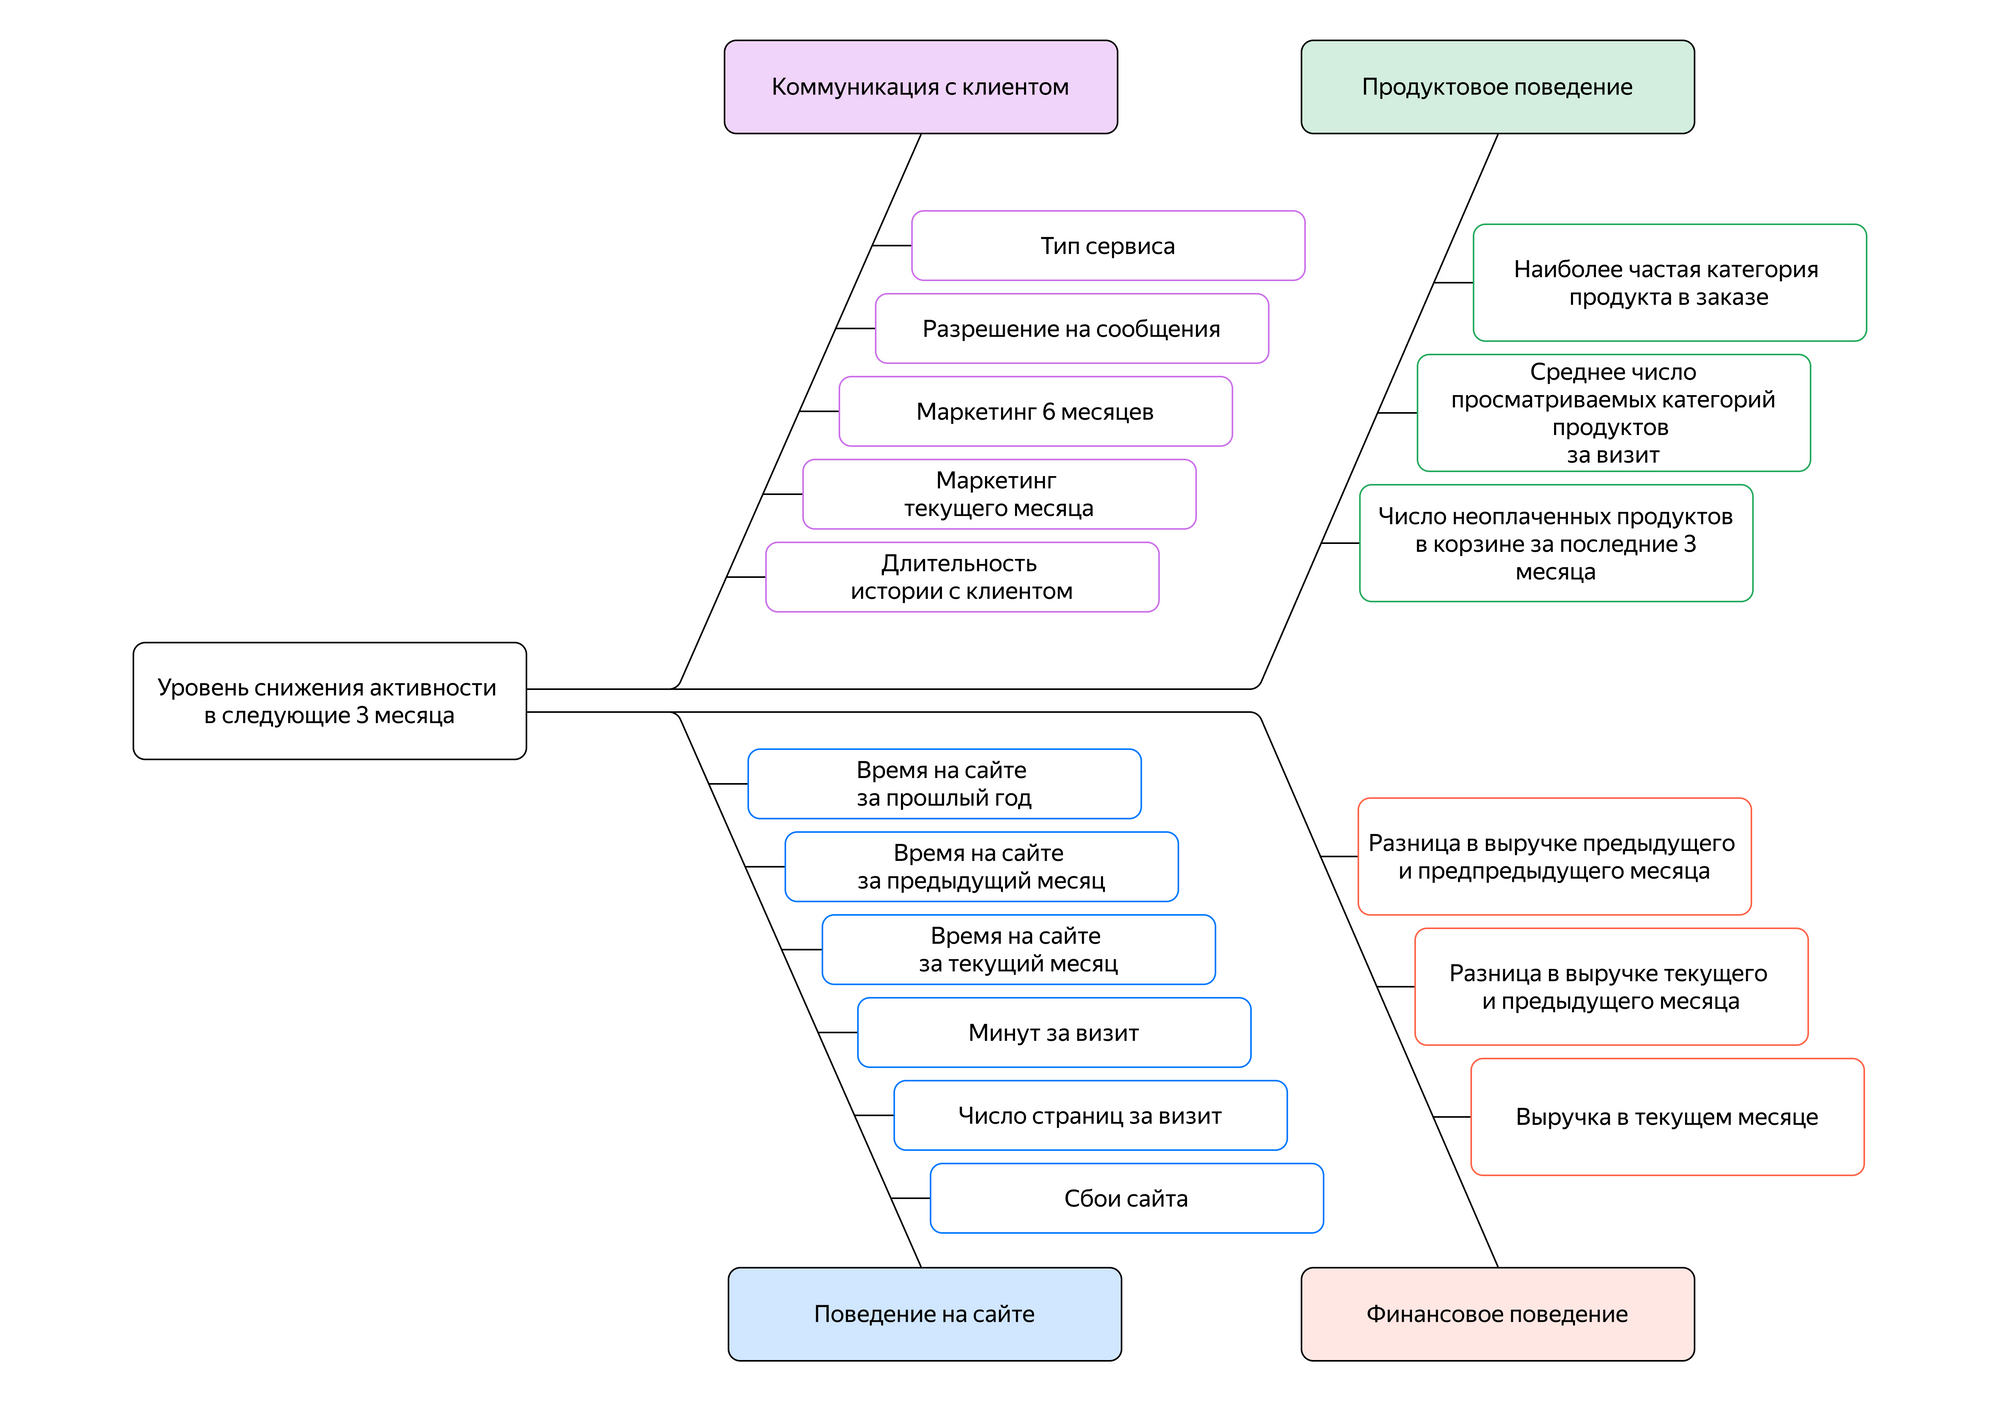

1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Руководство одобрило описание решения, и вам, как специалисту по DS, нужно его реализовать.

## Описание данных

Данные для работы находятся в нескольких таблицах. 

[`market_file.csv`](https://code.s3.yandex.net/datasets/market_file.csv)

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

[`market_money.csv`](https://code.s3.yandex.net/datasets/market_money.csv)

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, `'текущий_месяц'` или `'предыдущий_месяц'`.
- `Выручка` — сумма выручки за период.

[`market_time.csv`](https://code.s3.yandex.net/datasets/market_time.csv)

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

[`money.csv`](https://code.s3.yandex.net/datasets/money.csv)

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

## Загрузка данных

In [1]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 13.5 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 100.5 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shap -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import shap

from scipy import stats as st
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder, 
                                   OrdinalEncoder, 
                                   StandardScaler, 
                                   MinMaxScaler, 
                                   RobustScaler
                                  )
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_classif
from phik import phik_matrix
from phik.report import plot_correlation_matrix

In [5]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [6]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [7]:
# Предварительный обзор данных
dataframes = [market_file, market_money, market_time, money]

for df in dataframes:
    print("=" * 100)
    print('Общая информация о датафрейме:')
    print(df.info())
    print("*" * 100)
    print(f'Статистическое описание числовых данных датафрейма:\n {df.describe()}')

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11 

## Предобработка данных

### Датафрейм market_file

Изучим датафрейм и общую информацию о нем.

In [8]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [9]:
# Функция для преобразования столбцов к змеиному регистру
def snake_register(names_of_columns):
    snake_case_columns = [name.lower().replace(' ', '_') for name in names_of_columns]
    return snake_case_columns

In [10]:
market_file.columns = snake_register(market_file.columns.tolist())
# Проверка
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Приведем формат записи значений категориальных переменных к единому стилю - к нижнему регистру.

In [11]:
# Отделим категориальные признаки
cat_col_names = market_file.select_dtypes(exclude='number').columns.tolist()
cat_col_names

['покупательская_активность',
 'тип_сервиса',
 'разрешить_сообщать',
 'популярная_категория']

In [12]:
# Приведем формат значений категориальных переменых к единому
for cat_col in cat_col_names:
    market_file[cat_col] = market_file[cat_col].str.lower()
    display(f'Для {cat_col}: {market_file[cat_col].unique().tolist()}')

"Для покупательская_активность: ['снизилась', 'прежний уровень']"

"Для тип_сервиса: ['премиум', 'стандартт', 'стандарт']"

"Для разрешить_сообщать: ['да', 'нет']"

"Для популярная_категория: ['товары для детей', 'домашний текстиль', 'косметика и аксесуары', 'техника для красоты и здоровья', 'кухонная посуда', 'мелкая бытовая техника и электроника']"

Заметим опечатку в слове "акусесуары". Исправим на "аксессуары".

In [13]:
market_file.loc[market_file['популярная_категория'] == 'косметика и аксесуары', 'популярная_категория'] = 'косметика и аксессуары'
# Проверка
market_file['популярная_категория'].unique()

array(['товары для детей', 'домашний текстиль', 'косметика и аксессуары',
       'техника для красоты и здоровья', 'кухонная посуда',
       'мелкая бытовая техника и электроника'], dtype=object)

In [14]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

Изучив общую информацию о датафрейме, предварительно можно сказать, что пропуски в данных отсутсвуют, исходя из соответствия количества строк в каждом столбце общему количеству строк. Также во всех столбцах типы данных соответствуют содержащимся в них значениям.

Проверим на наличие дубликатов.

In [15]:
# Автоматизация проверки датафрейма на наличе дубликатов
# На входе функции подается комбинация столбцов, по которой можно проверить наличие НЕПОЛНЫХ явных дубликатов
def search_for_duplicates(df, column_combinations):
    
    # Проверка на наличие ПОЛНЫХ явных дубликатов
    print(f'Количество ПОЛНЫХ явных дубликатов: {df.duplicated().sum()}\n')
    
    # Проверка на наличие НЕПОЛНЫХ явных дубликатов
    cout_of_dup = df[column_combinations].duplicated().sum()
    print(f'Количество НЕПОЛНЫХ явных дубликатов: {cout_of_dup}\n')
    
    # Проверка на наличие неявных дубликаов
    if len(column_combinations) > 0:
        print(f'Проверка на неявные дубликаты:')
        for cat_col in df.select_dtypes(exclude='number').columns.tolist():
            print(f'- Для {cat_col}: {df[cat_col].unique().tolist()}')

In [16]:
search_for_duplicates(market_file, ['id'])

Количество ПОЛНЫХ явных дубликатов: 0

Количество НЕПОЛНЫХ явных дубликатов: 0

Проверка на неявные дубликаты:
- Для покупательская_активность: ['снизилась', 'прежний уровень']
- Для тип_сервиса: ['премиум', 'стандартт', 'стандарт']
- Для разрешить_сообщать: ['да', 'нет']
- Для популярная_категория: ['товары для детей', 'домашний текстиль', 'косметика и аксессуары', 'техника для красоты и здоровья', 'кухонная посуда', 'мелкая бытовая техника и электроника']


Можно заметить опечатку в значении "стандартт" переменной "тип_сервиса", дублирующем значение "стандарт". Исправим это.

In [17]:
market_file.loc[market_file['тип_сервиса'] == 'стандартт', 'тип_сервиса'] = 'стандарт'
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

### Датафрейм market_money

Изучим датафрейм и общую информацию о нем.

In [18]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [19]:
market_money.columns = snake_register(market_money.columns.tolist())
# Проверка
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [20]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Изучив общую информацию о датафрейме, предварительно можно сказать, что пропуски в данных отсутсвуют, исходя из соответствия количества строк в каждом столбце общему количеству строк. Также во всех столбцах типы данных соответствуют содержащимся в них значениям.

Проверим датафрейм на наличие дубликатов.

In [21]:
search_for_duplicates(market_money, ['id', 'период'])

Количество ПОЛНЫХ явных дубликатов: 0

Количество НЕПОЛНЫХ явных дубликатов: 0

Проверка на неявные дубликаты:
- Для период: ['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']


Дубликатов не обнаружено.

### Датафрейм market_time

In [22]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [23]:
market_time.columns = snake_register(market_time.columns.tolist())
# Проверка
market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Исправим опечатку в слову "предыдущий".

In [24]:
market_time.loc[market_time['период'] == 'предыдцщий_месяц', 'период'] = 'предыдущий_месяц'
market_time['период'].unique().tolist()

['текущий_месяц', 'предыдущий_месяц']

In [25]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Изучив общую информацию о датафрейме, предварительно можно сказать, что пропуски в данных отсутсвуют, исходя из соответствия количества строк в каждом столбце общему количеству строк. Также во всех столбцах типы данных соответствуют содержащимся в них значениям.

Проверим на наличие дубликатов.

In [26]:
search_for_duplicates(market_time, ['id', 'период'])

Количество ПОЛНЫХ явных дубликатов: 0

Количество НЕПОЛНЫХ явных дубликатов: 0

Проверка на неявные дубликаты:
- Для период: ['текущий_месяц', 'предыдущий_месяц']


Дубликатов не обнаружено.

### Датафрейм money

In [27]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [28]:
money.columns = snake_register(money.columns.tolist())
# Проверка
money.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [29]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Пропуски в столбцах отсутствуют, типы данных соответсвуют содержащимся в них значениям.

Проверим датафрейм на присутствие дубликатов.

In [30]:
search_for_duplicates(market_money, [])

Количество ПОЛНЫХ явных дубликатов: 0

Количество НЕПОЛНЫХ явных дубликатов: 0



Дубликатов обнаружено не было.

## Исследовательский анализ данных

In [31]:
# Функция для распределения признаков на категориальные и количественные
def distribution_by_data_types(df):
    
    quantitative_columns = df.select_dtypes(include = 'number').columns.tolist()
    categorical_columns = df.select_dtypes(exclude = 'number').columns.tolist()
    
    return quantitative_columns, categorical_columns

In [32]:
# Функция для исследования количественного признака
def research_quantitative_signs(df, col, target):
    
    sns.set(context='poster')
    sns.set(style='white')
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))  

    # Построение гистограммы
    sns.histplot(x=col, data=df, ax=axs[0], palette='viridis', bins=20, hue=target)
    axs[0].set_title('Гистограмма')
    axs[0].set_xlabel('Значения')
    axs[0].set_ylabel('Количество')

    # Построение ящика с усами
    sns.boxplot(x=col, data=df, ax=axs[1], palette='viridis')
    axs[1].set_title('Ящик с усами')
    axs[1].set_xlabel('Значения')  

    # Заголовок для всего рисунка
    fig.suptitle(f'Распределение для столбца \'{col}\'', fontsize=16)

    # Показать графики
    plt.show()

    # Описание данных
    print(f'Описание данных для столбца \'{col}\':\n{df[col].describe()}')

In [33]:
# Функция для исследования категориального признака
def research_categorical_signs(df, col):
    
    sns.set(context='poster')
    sns.set(style='white')
    plt.figure(figsize=(10, 6))
    
    sorted_df = df[col].value_counts().reset_index().rename(columns={'index': col, col: 'Количество'})
    
    # Построение столбчатой диаграммы
    sns.barplot(data=sorted_df, x=col, y='Количество', palette='viridis')
    plt.title(f'Распределение для столбца \'{col}\'', fontsize=16)
    plt.ylabel('Количество', fontsize=14)
    plt.xlabel(col, fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

In [34]:
# Функция для проведения исследовательского анализа данных
def research_analysis(df, target_col):
    
    qua_col_names, cat_col_names = distribution_by_data_types(df)
    
    # Исследование количественных признаков
    for qua_col in qua_col_names:
        research_quantitative_signs(df, qua_col, target_col)
    
    # Исследование категориальных признаков
    for cat_col in cat_col_names:
        research_categorical_signs(df, cat_col) 

### Датафрейм market_file

In [35]:
# Сделаем значения столбца 'id' индексами
market_file = market_file.set_index('id')
market_file.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
id,,,,,,,,,,,,
215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5
215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2


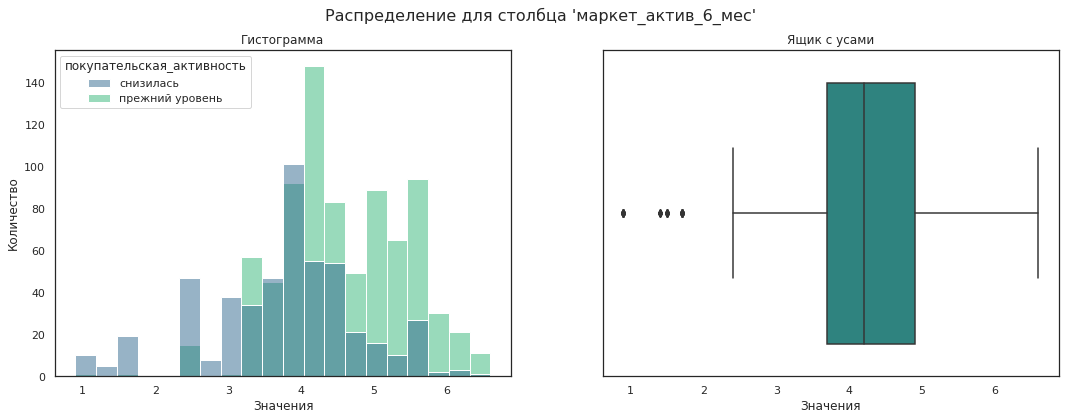

Описание данных для столбца 'маркет_актив_6_мес':
count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


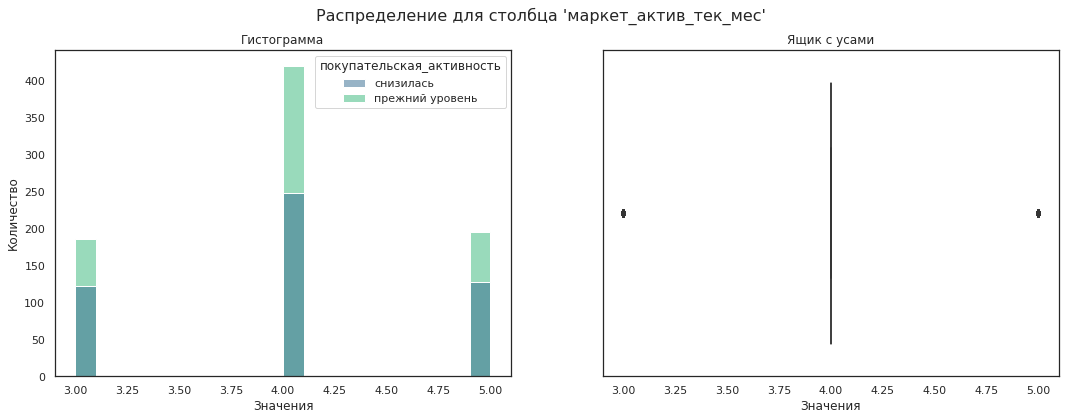

Описание данных для столбца 'маркет_актив_тек_мес':
count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64


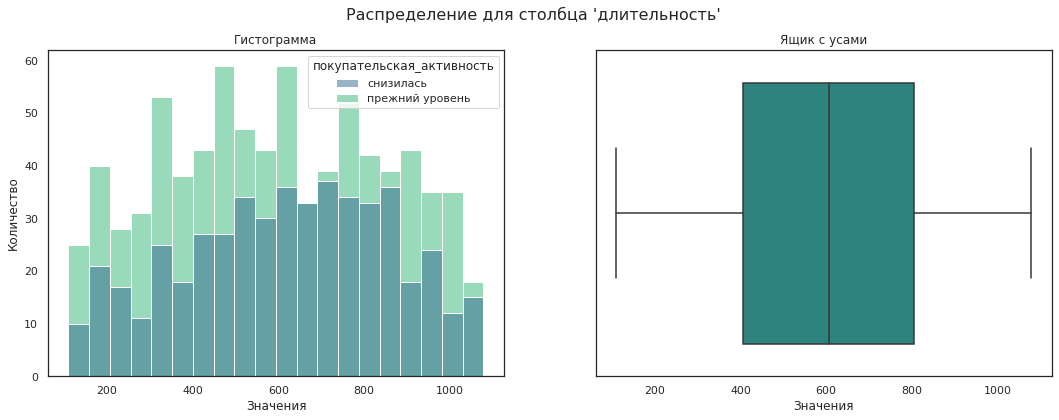

Описание данных для столбца 'длительность':
count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64


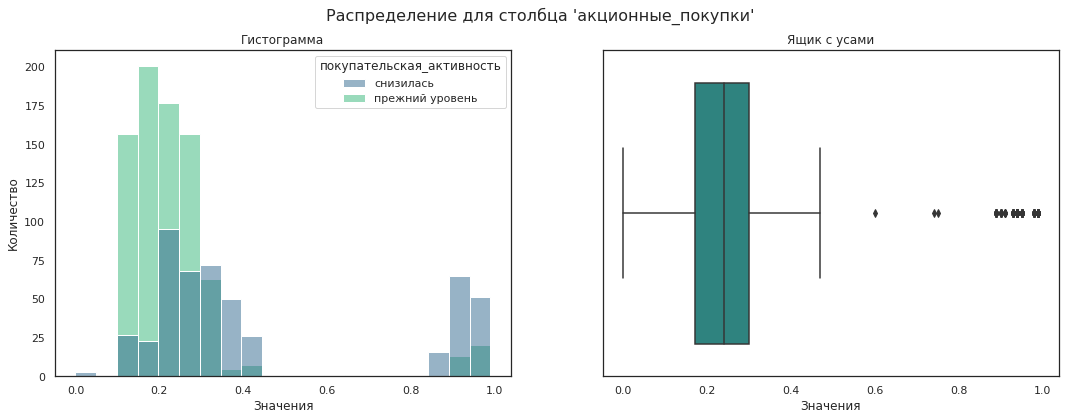

Описание данных для столбца 'акционные_покупки':
count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


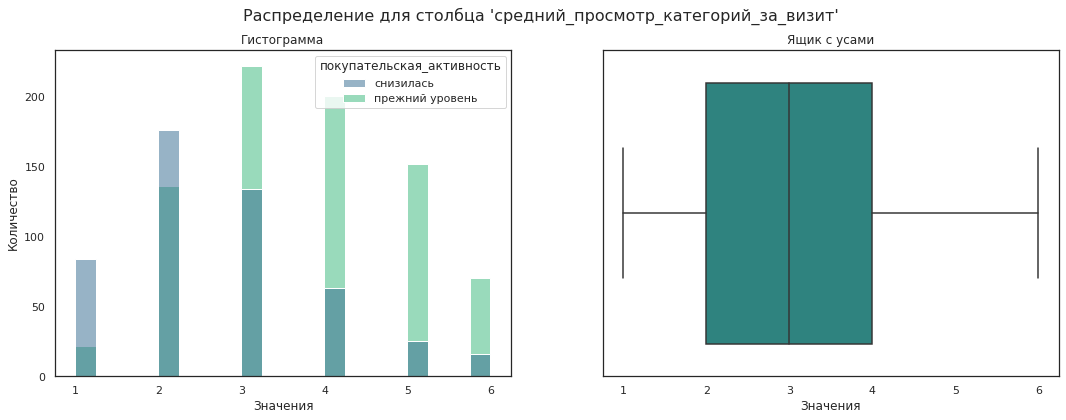

Описание данных для столбца 'средний_просмотр_категорий_за_визит':
count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64


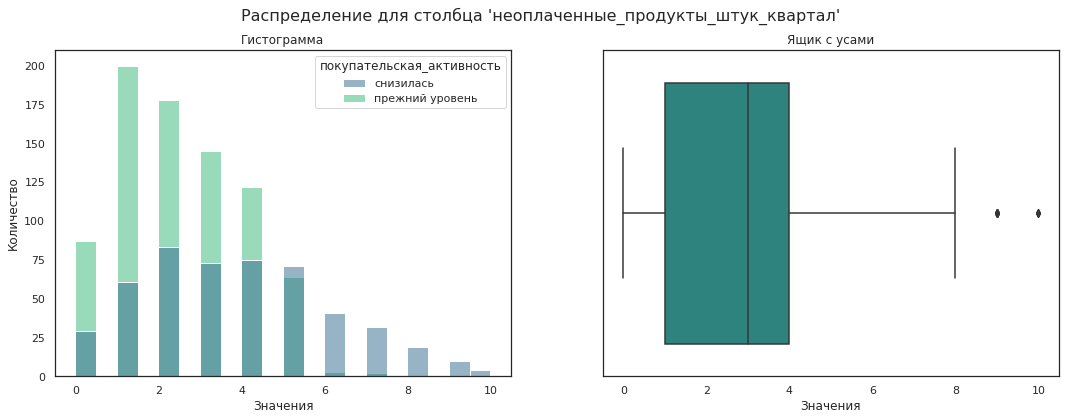

Описание данных для столбца 'неоплаченные_продукты_штук_квартал':
count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


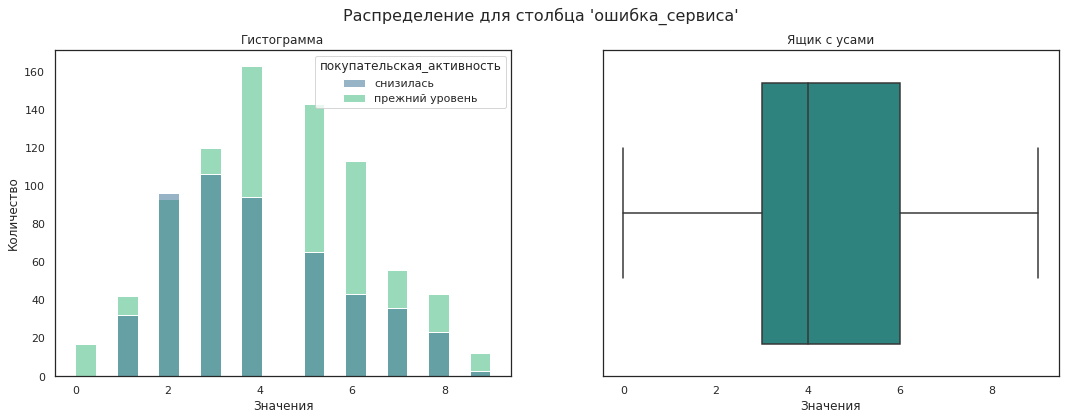

Описание данных для столбца 'ошибка_сервиса':
count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64


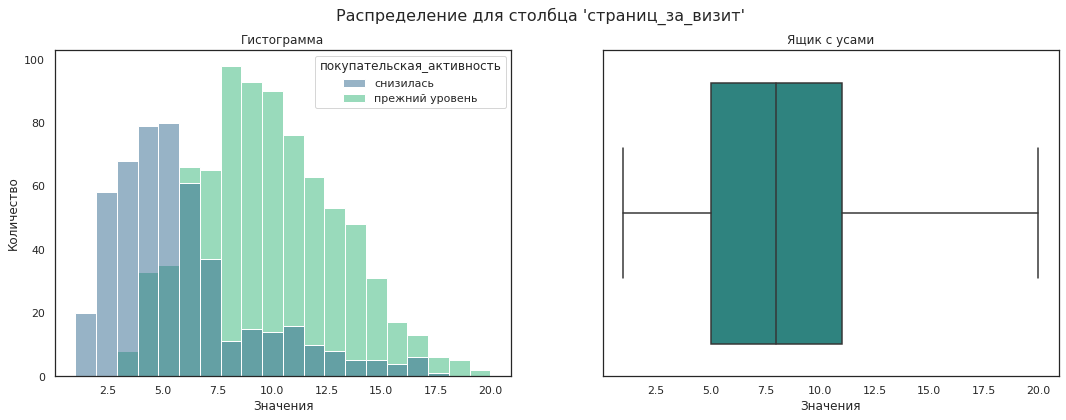

Описание данных для столбца 'страниц_за_визит':
count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


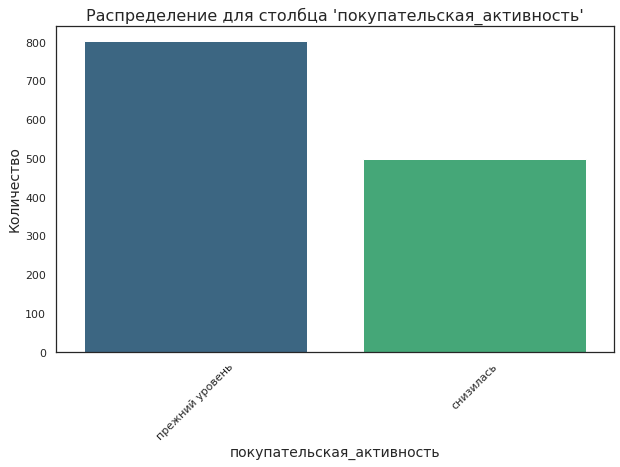

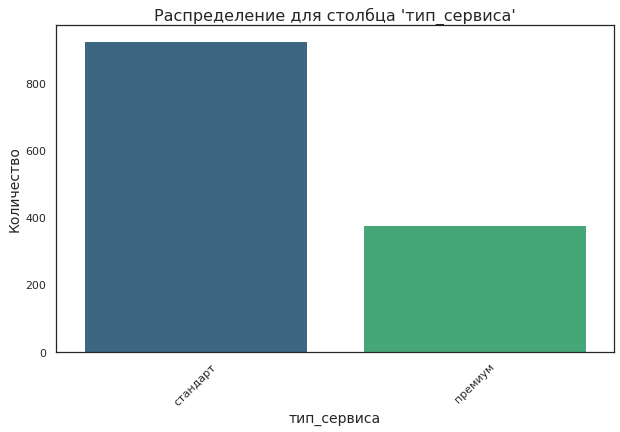

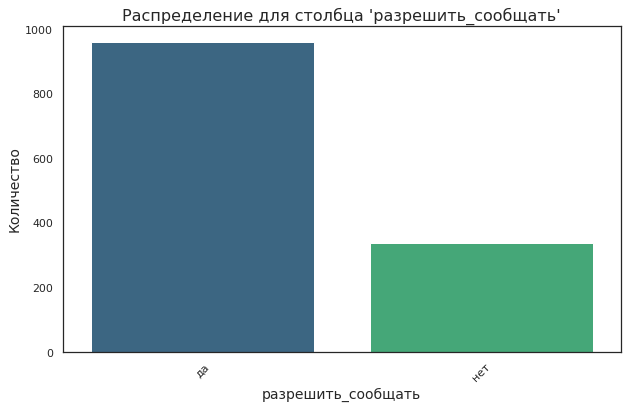

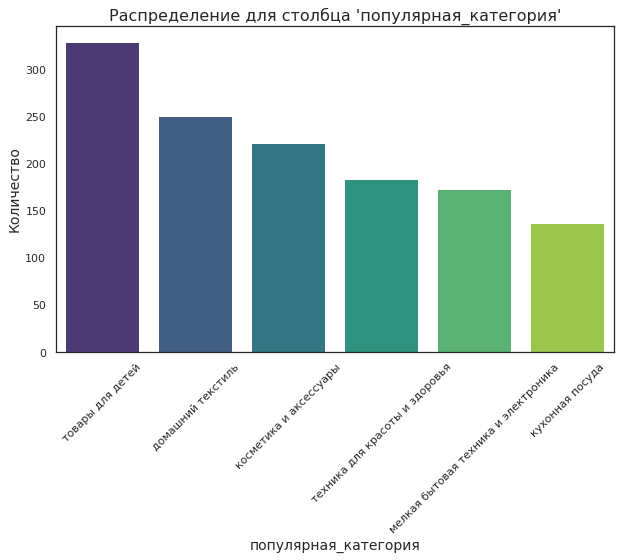

In [36]:
research_analysis(market_file, 'покупательская_активность')

По результатам исследовательского анализа датафрейма market_file, можно сделать следующие выводы:
- `Маркет_актив_6_мес` — в среднем за последние 6 месяцев на каждого покупателя приходилось около 4 маркетинговых коммуникаций компании. Распределение значений данного признака носит нормальный характер. Также можно заметить некоторое количество выбросов - это покупатели, с которыми происходило меньше двух рекламных взаимодействий. Все они относятся к категории клиентов, активность которых снизилась. Возможно, это люди, которые лишь  зарегистрировались на маркетплейсе, получили какое-то “приветственное” предложение или акцию, а затем пропали или поставили запрет на сообщения от интернет-магазина, возможно сам интернет-магазин перестал проводить маркетинговые коммуникации с клиентами, что привело к снижению их покупательской активности.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце так же в среднем равно 4. В целом происходит от 3 до 5 взаимодействий с клиентом каждой категории - с пониженной и нормальной активностью.
- `Длительность` — распределение значений данного признака имеет нормальный характер. В среднем клиентская база состоит из людей, зарегистрировавшихся около 600 дней назад. Можно предположить, что в тот период проходила какая-то активная маркетинговая кампания, которая принесла наибольший приток клиентов. Значения данного признака варьируются от 110 до 1079 дней с момента регистрации. Выбросы отсутствуют.
- `Акционные_покупки` — данный признак имеет нормальное распределение однако состоит из двух пиков. Первый характеризует покупателей, у которых доля покупок по акции от общего числа покупок за последние 6 месяцев в среднем составляет около 0.24, то есть это люди, которые не гонятся только за скидками/акциями, а просто покупают необходимые им вещи. Скорее всего они являются постоянными покупателями, которые периодически могут воспользоваться выгодными предложениями. Второй пик - это группа людей, доля акционных покупок которых составляет от 0.9 до 0.99. Это клиенты, которые в основном “заглядывают” только на акции, и судя по гистограмме, именно среди них преобладают клиенты с пониженной покупательской активностью: нет акций - нет активнсти.
- `Средний_просмотр_категорий_за_визит` — признак имеет нормальное распределение. В среднем среднее количество просматриваемых покупателем c прежним уровнем активности категорий за визит в течение последнего месяца равно 3, а покупатели со сниженным уровнем активности просматривают в среденем около 2-х категорий. Обычно покупатели просматривают от 1 до 6 категорий (всего на маркетплейсе представлено 6 категорий товаров).
- `Неоплаченные_продукты_штук_квартал` — распределение данного признака также носит нормальный характер. В среднем общее число неоплаченных товаров в корзине за последние 3 месяца равно 3. Имеются выбросы - покупатели с более чем 8 неоплаченными товарами, и все они с пониженной активностью. Видимо, находятся в ожидании скидок и специальных предложений.
- `Ошибка_сервиса` — признак имеет нормальное распределение. В среднем покупатели сталкивались с 4 сервисными ошибками во время посещения сайта.
- `Страниц_за_визит` — распределение значений данного признака нормальное. Среднее количество страниц, просматриваемых покупатель с прежней активностью за один визит на сайт за последние 3 месяца равно 8, а с пониженной - около 4-5 страниц за визит. Больше 20 страниц покупатели обычно не просматривали.
- `Покупательская активность` — целевой признак. Изучив столбчатую диаграмму целевого признака, мы можем точно сказать, что имеем дело с дисбалансом классов. К мажорному классу относятся покупатели с прежним уровнем покупательской активности, а к минорному - со снизившимся уровнем (разница практически в два раза). В контексте данной задачи такое явление абсолютно нормально. Если бы было наоборот или хотя бы поровну, то возникал бы ряд вопросов относительно пригодности маркетплейса и прибыльности его существования.

In [37]:
market_file['покупательская_активность'].value_counts()

прежний уровень    802
снизилась          498
Name: покупательская_активность, dtype: int64

Нельзя устранить такой дисбаланс, не нарушив закономерности данных. Его нужно учитывать во время подготовки данных и обучения модели.

- `Тип сервиса` — наблюдений с уровнем сервиса «премиум» более чем 2 раза меньше наблюдений с уровнем «стандарт».
- `Разрешить сообщать` — более 900 покупателей дали свое согласие на получение сообщений от магазина, и менее 400 - запретили рассылку.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев - товары для детей. Самая непопулярная - кухонная посуда.

### Датафрейм market_money

In [38]:
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Создадим сводную таблицу для дальнейшего удобства. Сделаем отдельный столбец для каждого периода.

In [39]:
market_money = market_money.pivot_table(index='id', columns='период', values='выручка', aggfunc='sum')
new_order = ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']
market_money = market_money.reindex(columns=new_order)
market_money.head()

период,препредыдущий_месяц,предыдущий_месяц,текущий_месяц
id,,,
215348,0.0,0.0,3293.1
215349,4472.0,5216.0,4971.6
215350,4826.0,5457.5,5058.4
215351,4793.0,6158.0,6610.4
215352,4594.0,5807.5,5872.5


In [40]:
# Создание нового списка столбцов, включая 'покупательская_активность'
columns_to_select = market_money.columns.tolist() + ['покупательская_активность']

# Объединение данных
market_money_with_target = market_money.join(market_file, how='left')[columns_to_select]
market_money_with_target.head()

,препредыдущий_месяц,предыдущий_месяц,текущий_месяц,покупательская_активность
id,,,,
215348,0.0,0.0,3293.1,снизилась
215349,4472.0,5216.0,4971.6,снизилась
215350,4826.0,5457.5,5058.4,снизилась
215351,4793.0,6158.0,6610.4,снизилась
215352,4594.0,5807.5,5872.5,снизилась


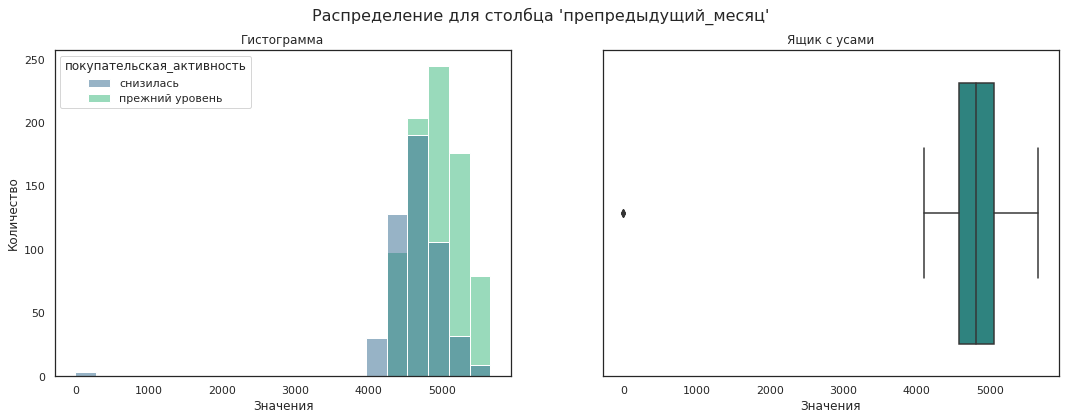

Описание данных для столбца 'препредыдущий_месяц':
count    1300.000000
mean     4825.206923
std       405.979663
min         0.000000
25%      4583.000000
50%      4809.000000
75%      5053.500000
max      5663.000000
Name: препредыдущий_месяц, dtype: float64


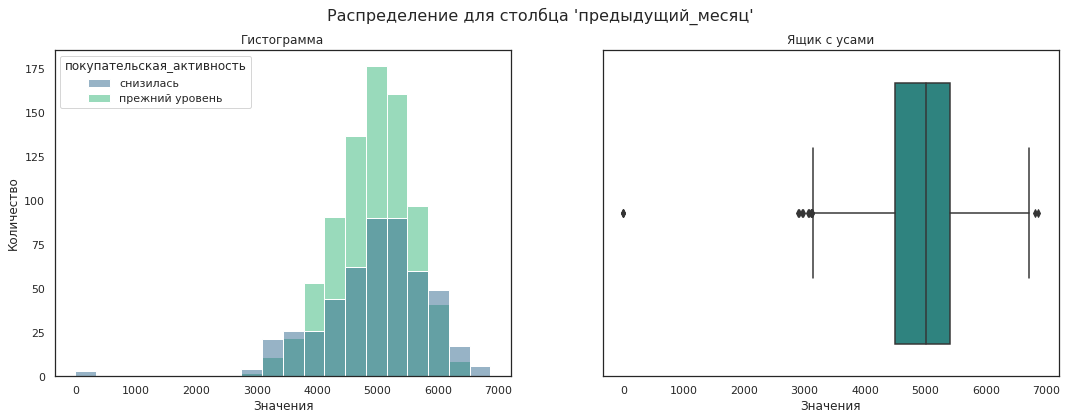

Описание данных для столбца 'предыдущий_месяц':
count    1300.000000
mean     4936.920385
std       739.597997
min         0.000000
25%      4496.750000
50%      5005.000000
75%      5405.625000
max      6869.500000
Name: предыдущий_месяц, dtype: float64


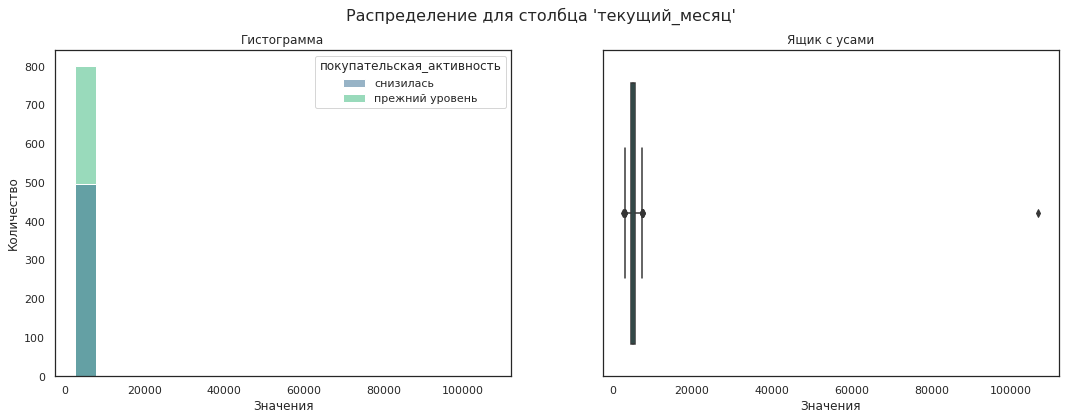

Описание данных для столбца 'текущий_месяц':
count      1300.000000
mean       5314.960846
std        2939.708156
min        2758.700000
25%        4706.050000
50%        5179.950000
75%        5761.725000
max      106862.200000
Name: текущий_месяц, dtype: float64


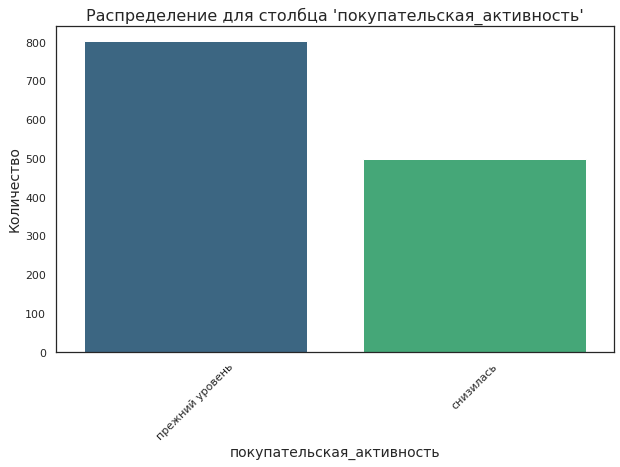

In [41]:
research_analysis(market_money_with_target, 'покупательская_активность')

Изучив результаты исследовательского анализа датафрейма market_money, можно сделать выводы о том, что в препредыдущем и предыдущем месяцах выручка с покупателя в среднем составляла в районе 4825-4936 рублей. Распределение ее носит нормальный характер.

В текущем месяце наше внимание привлекает выброс. Покупатель, прибыль с которого составляет 106862. Удалим его.

In [42]:
market_money[market_money['текущий_месяц'] > 20000]

период,препредыдущий_месяц,предыдущий_месяц,текущий_месяц
id,,,
215380,5051.0,6077.0,106862.2


Как мы можем видеть, в предыдущие два месяца покупатель совершал покупки и совершал их на суммы немного выше средних за соответствующие месяцы. Можно сказать, что это постоянный покупатель, у которого в текущем месяце, вомзожно, произошло какое-то важное событие, толкнувшее к высоким расходам. Удалим выброс.

In [43]:
market_money = market_money.drop(215380)

Рассмотрим теперь тот же признак, но без выброса, более детально, чтобы сделать выводы о характере распределния.

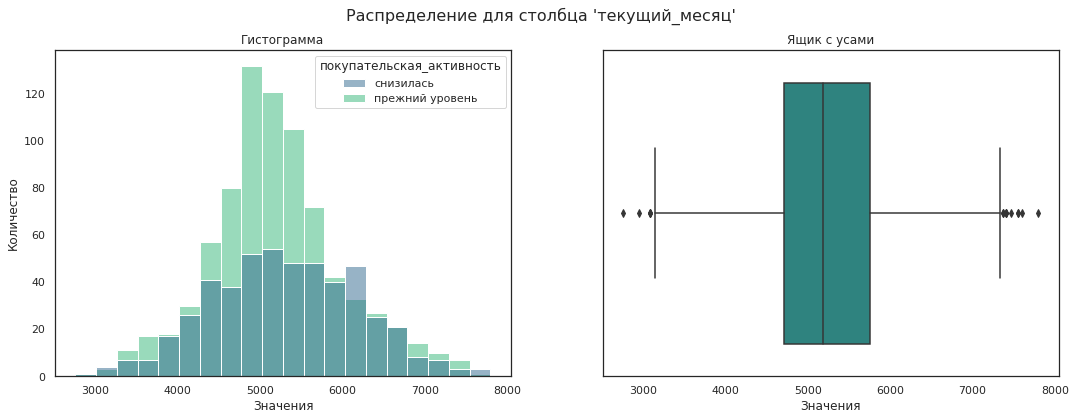

Описание данных для столбца 'текущий_месяц':
count    1299.000000
mean     5236.787452
std       835.474686
min      2758.700000
25%      4705.500000
50%      5179.600000
75%      5759.950000
max      7799.400000
Name: текущий_месяц, dtype: float64


In [44]:
research_quantitative_signs(market_money_with_target.drop(215380), 'текущий_месяц', 'покупательская_активность')

Распределение носит нормальный характер. Среднее значение прибыли - 5236.

Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [45]:
market_money.shape

(1299, 3)

In [46]:
market_money.loc[(market_money['препредыдущий_месяц'] == 0) | (market_money['предыдущий_месяц'] == 0) | (market_money['текущий_месяц'] == 0)].shape

(3, 3)

In [47]:
market_money = market_money.loc[(market_money['препредыдущий_месяц'] != 0) & (market_money['предыдущий_месяц'] != 0) & (market_money['текущий_месяц'] != 0)]
market_money.shape

(1296, 3)

### Датафрейм market_time

In [48]:
market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


Создадим сводную таблицу для дальнейшего удобства. Сделаем отдельный столбец для каждого периода.

In [49]:
market_time = market_time.pivot_table(index='id', columns='период', values='минут', aggfunc='sum')
new_order = ['предыдущий_месяц', 'текущий_месяц']
market_time = market_time.reindex(columns=new_order)
market_time.head()

период,предыдущий_месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


In [50]:
# Создание нового списка столбцов, включая 'покупательская_активность'
columns_to_select = market_time.columns.tolist() + ['покупательская_активность']

# Объединение данных
market_time_with_target = market_time.join(market_file, how='left')[columns_to_select]
market_time_with_target.head()

,предыдущий_месяц,текущий_месяц,покупательская_активность
id,,,
215348,13,14,снизилась
215349,12,10,снизилась
215350,8,13,снизилась
215351,11,13,снизилась
215352,8,11,снизилась


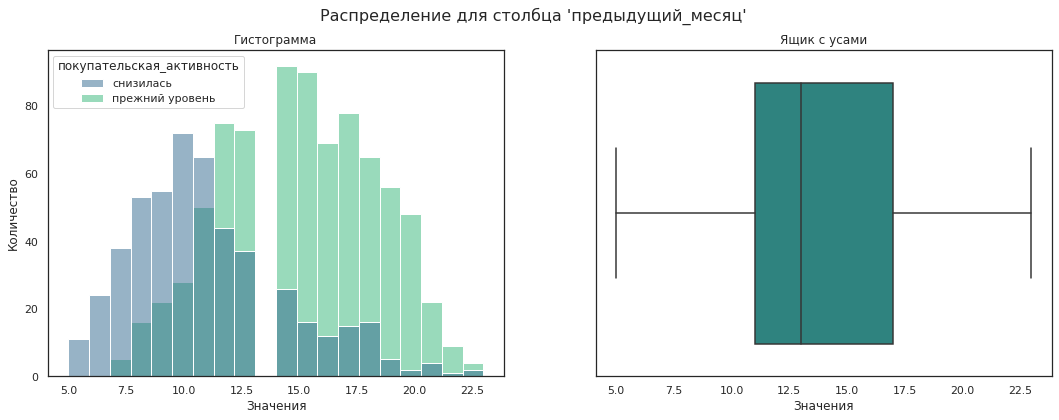

Описание данных для столбца 'предыдущий_месяц':
count    1300.000000
mean       13.467692
std         3.932029
min         5.000000
25%        11.000000
50%        13.000000
75%        17.000000
max        23.000000
Name: предыдущий_месяц, dtype: float64


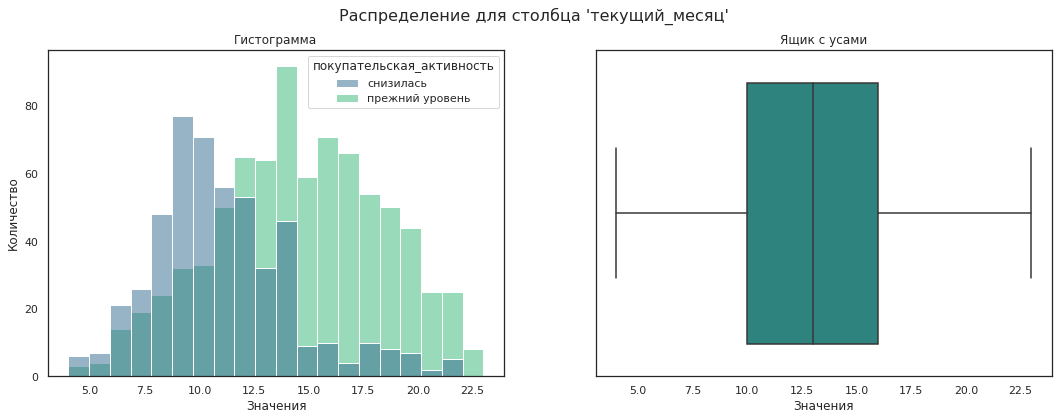

Описание данных для столбца 'текущий_месяц':
count    1300.000000
mean       13.204615
std         4.220589
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: текущий_месяц, dtype: float64


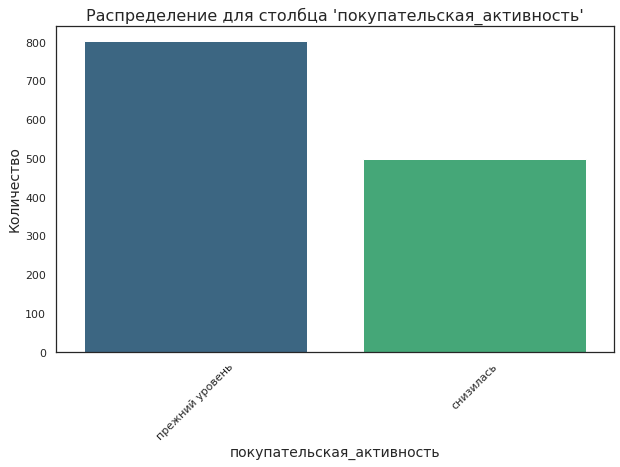

In [51]:
research_analysis(market_time_with_target, 'покупательская_активность')

Распределения значений времени за предыдущий и текущий месяц имеют нормальное распределение. Среднее значение времени в каждый из двух месяцев - 13 минут.

### Датафрейм money

In [52]:
money = money.set_index('id')
# Создание нового списка столбцов, включая 'покупательская_активность'
columns_to_select = money.columns.tolist() + ['покупательская_активность']

# Объединение данных
money_with_target = money.join(market_file, how='left')[columns_to_select]
money_with_target.head()

,прибыль,покупательская_активность
id,,
215348,0.98,снизилась
215349,4.16,снизилась
215350,3.13,снизилась
215351,4.87,снизилась
215352,4.21,снизилась


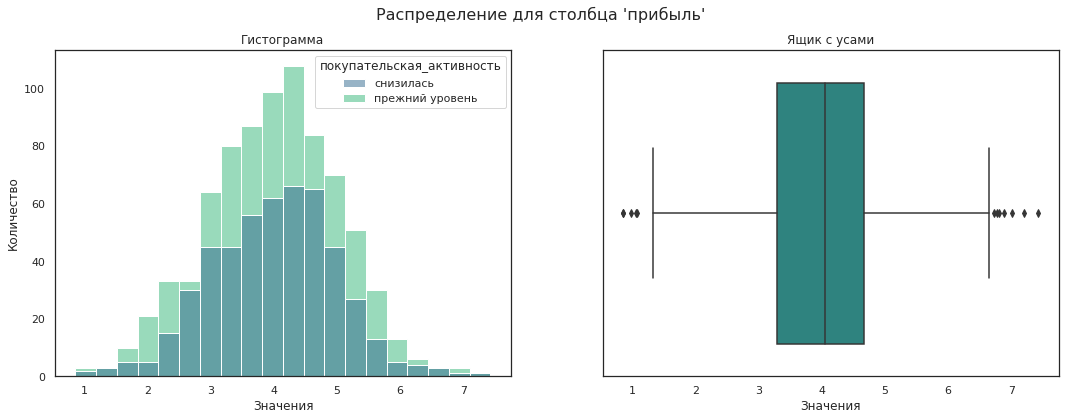

Описание данных для столбца 'прибыль':
count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


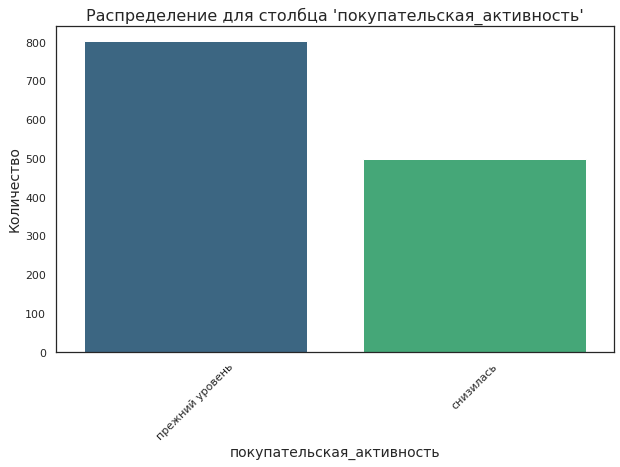

In [53]:
research_analysis(money_with_target, 'покупательская_активность')

Признак имеет нормальное распределение. Среднее значение - 4.

## Объединение таблиц

Объединим таблицы market_file.csv, market_money.csv, market_time.csv. 

In [54]:
market_file.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
id,,,,,,,,,,,,
215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5
215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2


In [55]:
market_money.head()

период,препредыдущий_месяц,предыдущий_месяц,текущий_месяц
id,,,
215349,4472.0,5216.0,4971.6
215350,4826.0,5457.5,5058.4
215351,4793.0,6158.0,6610.4
215352,4594.0,5807.5,5872.5
215353,5124.0,4738.5,5388.5


In [56]:
market_time.head()

период,предыдущий_месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


In [57]:
final_df = market_file.join(market_money, how='right')
final_df.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,препредыдущий_месяц,предыдущий_месяц,текущий_месяц
id,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,4793.0,6158.0,6610.4
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,4594.0,5807.5,5872.5
215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5


In [58]:
final_df = final_df.rename(columns={'препредыдущий_месяц': 'выручка_за_препредыдущий_месяц',
                                   'предыдущий_месяц': 'выручка_за_предыдущий_месяц',
                                   'текущий_месяц': 'выручка_за_текущий_месяц'})
final_df.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_препредыдущий_месяц,выручка_за_предыдущий_месяц,выручка_за_текущий_месяц
id,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,4793.0,6158.0,6610.4
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,4594.0,5807.5,5872.5
215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5


In [59]:
final_df = final_df.join(market_time, how='left')
final_df.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_препредыдущий_месяц,выручка_за_предыдущий_месяц,выручка_за_текущий_месяц,предыдущий_месяц,текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [60]:
final_df = final_df.rename(columns={'предыдущий_месяц': 'время_за_предыдущий_месяц',
                                   'текущий_месяц': 'время_за_текущий_месяц'})
final_df.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_препредыдущий_месяц,выручка_за_предыдущий_месяц,выручка_за_текущий_месяц,время_за_предыдущий_месяц,время_за_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [61]:
# Проверка, должно быть 1296 строк
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

## Корреляционный анализ

### Общий

In [62]:
# Создаем список с наименованиями непрерывных признаков
interval_col_names, cat_col_names = distribution_by_data_types(final_df)
interval_col_names

['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'выручка_за_препредыдущий_месяц',
 'выручка_за_предыдущий_месяц',
 'выручка_за_текущий_месяц',
 'время_за_предыдущий_месяц',
 'время_за_текущий_месяц']

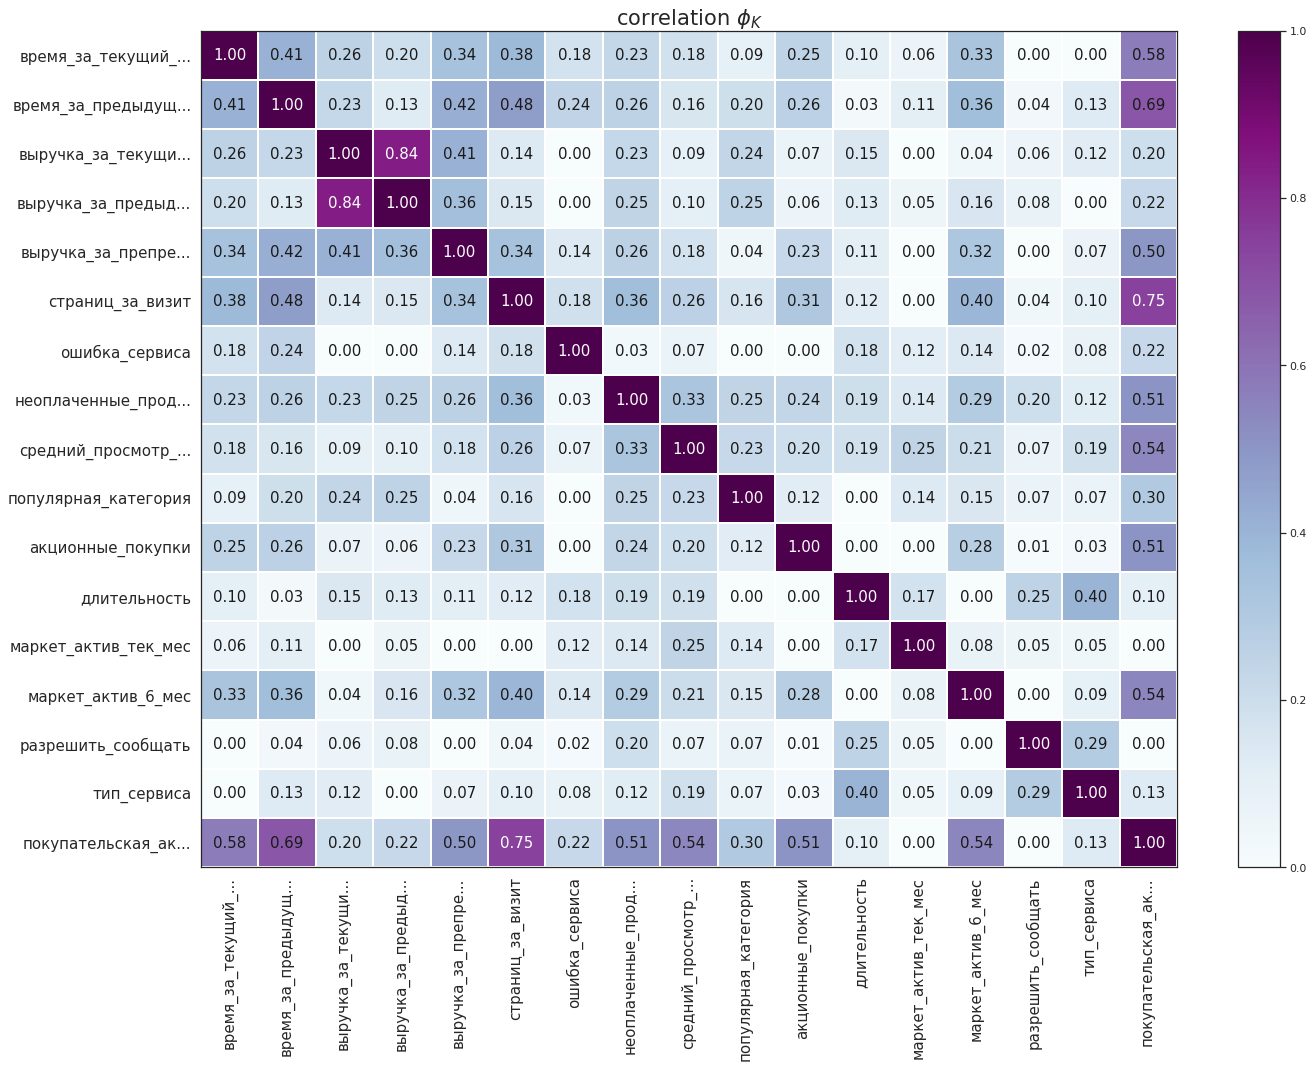

In [63]:
# Рассчитаем корреляционную матрицу
phik_overview = phik_matrix(final_df, interval_cols=interval_col_names)

# Визуализируем корреляционную матрицу
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map='BuPu',
                        title=r'correlation $\phi_K$',
                        fontsize_factor=1.5,
                        figsize=(20, 15))

In [64]:
phik_overview.columns.tolist()

['покупательская_активность',
 'тип_сервиса',
 'разрешить_сообщать',
 'маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'популярная_категория',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'выручка_за_препредыдущий_месяц',
 'выручка_за_предыдущий_месяц',
 'выручка_за_текущий_месяц',
 'время_за_предыдущий_месяц',
 'время_за_текущий_месяц']

Изучив корреляционную матрицу, можно сделать следующие выводы:
- мультиколлинеарность отсутсвует
- целевой признак "Покупательская активность" **среднюю зависимость** от признаков **'время_за_предыдущий_месяц', 'время_за_текущий_месяц', 'выручка_за_препредыдущий_месяц', 'неоплаченные_продукты_штук_квартал', 'средний_просмотр_категорий_за_визит', 'акционные_покупки', 'маркет_актив_6_мес'** и **высокую зависимость** от признака **'страниц_за_визит'**

Построим дополнительно матрицы корреляций для двух датасетов разбитых по таргету. Затем проанализируем есть ли отличия в корреляции.

### Для клиентов со снизившейся покупательской активность

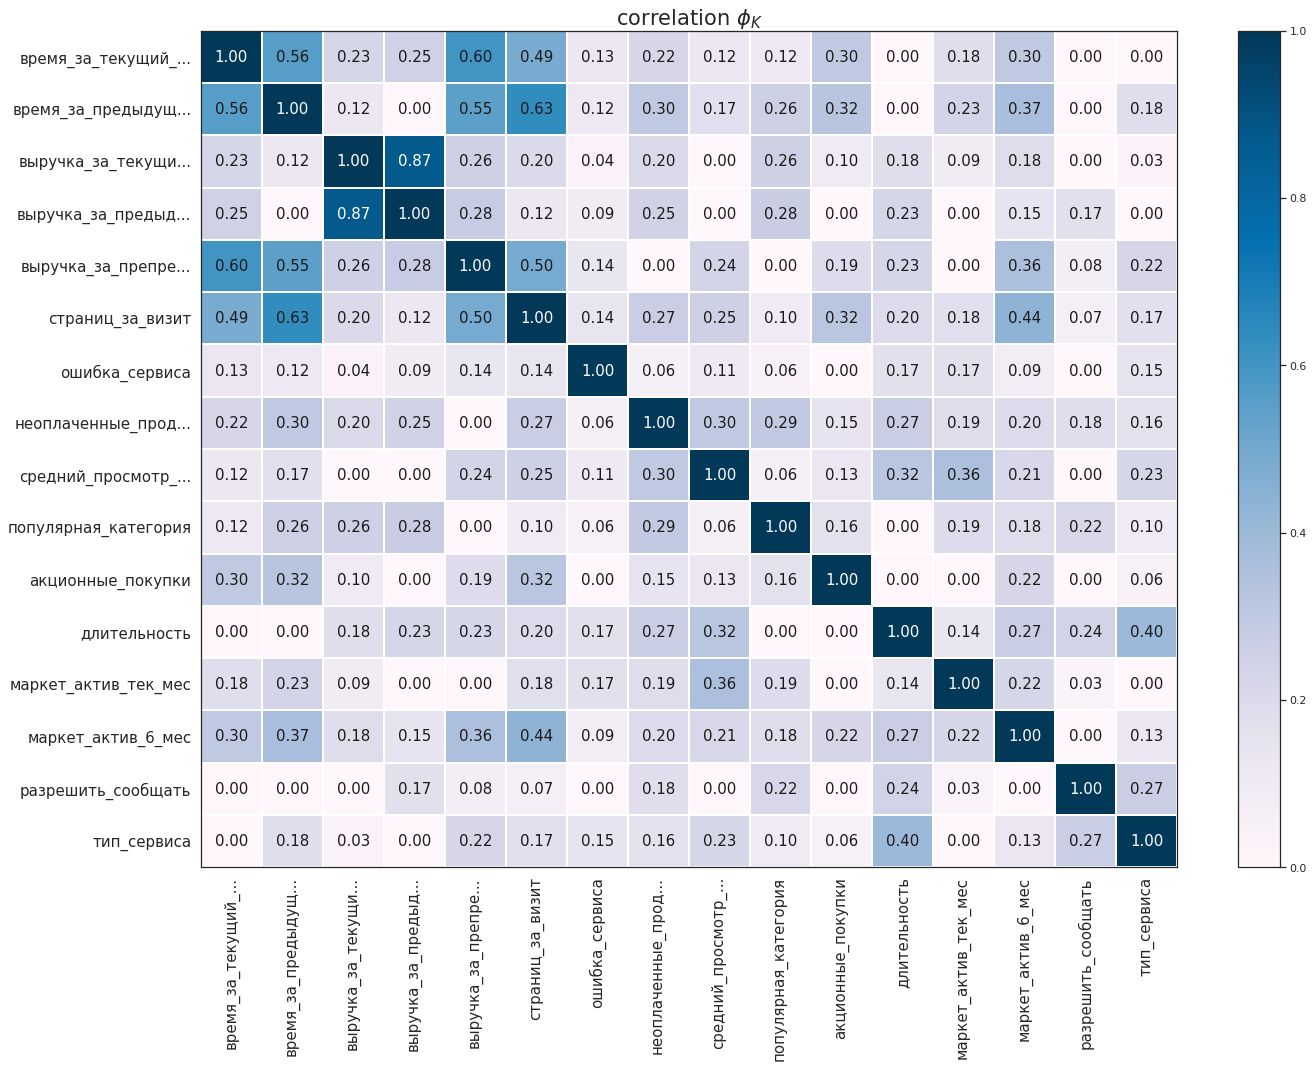

In [65]:
# Рассчитаем корреляционную матрицу
phik_overview = phik_matrix(final_df[final_df['покупательская_активность'] == 'снизилась'].drop('покупательская_активность', axis=1), interval_cols=interval_col_names)

# Визуализируем корреляционную матрицу
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map='PuBu',
                        title=r'correlation $\phi_K$',
                        fontsize_factor=1.5,
                        figsize=(20, 15))

По результатам проведенного анализа можно сказать следующее:
- время, проведенное на сайте интернета магазина в текущем месяце, имеет среднюю зависимость от времени, проведенном на сайте интернета магазина в предыдущем месяце, и от выручки за препредыдущий месяц
Коэффициент корреляции положительный, и так как мы имеем дело с категорией покупателей, покупательская активность которых снизилась - это означает, что чем меньше пользователи проводят времени на сайте в предыдущем месяце и чем ниже была выручка в прошлом месяце, тем скорее всего будет меньше времени, проведенного на сайте в текущем месяце. То есть можно сказать, что два перечисленных фактора влияют на интерес покупателя.
- 'время_за_предыдущий_месяц' имеет среднюю зависимость от 'выручка_за_препредыдущий_месяц' и от 'страниц_за_визит'
Ситуация аналогичная предыдущей. Уменьшение выручки за предыдущий месяц и страниц за визит влеет за собой уменьшение времени, проводимого в процессе скролинга маркетплейса, то есть потерю интереса.
- 'выручка_за_препредыдущий_месяц' имеет среднюю зависимость от 'страниц_за_визит'
Вполне логично, что чем меньше страниц за визит было просмотрено, тем меньше было желание покупателя что-то найти и купить, а значит и меньше выручка.
- и высокую зависимость признака 'выручка_за_текущий_месяц' от 'выручка_за_предыдущий_месяц'

### Для клиентов со прежней покупательской активность

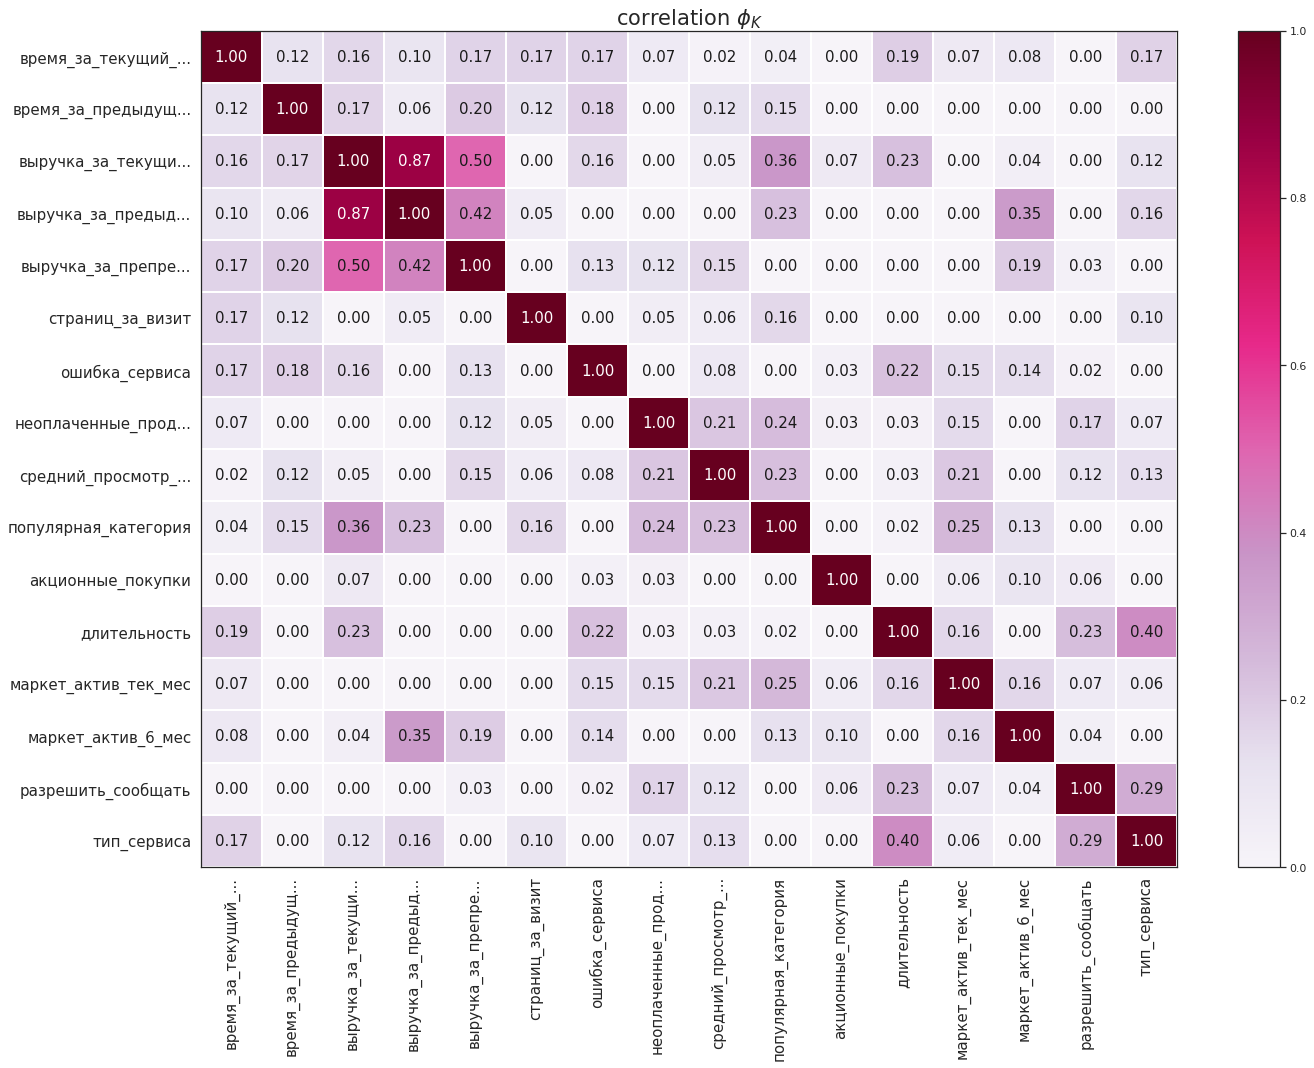

In [66]:
# Рассчитаем корреляционную матрицу
phik_overview = phik_matrix(final_df[final_df['покупательская_активность'] == 'прежний уровень'].drop('покупательская_активность', axis=1), interval_cols=interval_col_names)

# Визуализируем корреляционную матрицу
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map='PuRd',
                        title=r'correlation $\phi_K$',
                        fontsize_factor=1.5,
                        figsize=(20, 15))

- 'выручка_за_текущий_месяц' имеет среднюю зависимость от 'выручка_за_препредыдущий_месяц' и высокую зависимость от 'выручка_за_предыдущий_месяц'

**Общий вывод**:
- можно выделяить следущее отличие между корреляционной матрицей построенной для датасета не разбитого по таргету и для двух других, отвечающих за анлиз датасетов для каждого отдельного значения целевого признака: в двух последних объем мультиколлинеарных зависимостей больше чем в первой
- также можно отметить одно главное сходство - высокую зависимость признака 'выручка_за_текущий_месяц' от 'выручка_за_предыдущий_месяц'

## Использование пайплайнов

Перед нами стоит задача бинарной классификации, так как целевой признак 'Покупательская активность' принимает лишь два значения: «снизилась» или «прежний уровень». Также не стоит забывать про дисбаланс классов, который нам нужно будет учесть при разбиение датафрейма на тренировочные и тестовые выборки.

In [67]:
X = final_df.drop('покупательская_активность', axis=1)
y = final_df['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=RANDOM_STATE,
                                                    test_size=TEST_SIZE,
                                                    stratify=final_df['покупательская_активность']
                                                   )

In [68]:
final_df.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_препредыдущий_месяц,выручка_за_предыдущий_месяц,выручка_за_текущий_месяц,время_за_предыдущий_месяц,время_за_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


Закодируем целевой признак с помощью LabelEncoder.

In [69]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# Проверка
pred_classes = [0, 1]
print(label_encoder.inverse_transform(pred_classes))

['прежний уровень' 'снизилась']


In [70]:
num_columns, cat_columns = distribution_by_data_types(final_df)
print(f'Количественные признаки: {num_columns}\n\nКатегориальные признаки: {cat_columns}')

Количественные признаки: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_за_препредыдущий_месяц', 'выручка_за_предыдущий_месяц', 'выручка_за_текущий_месяц', 'время_за_предыдущий_месяц', 'время_за_текущий_месяц']

Категориальные признаки: ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']


- Количественные признаки будут кодироваться с помощью StandardScaler, MinMaxScaler, RobustScaler и без кодировки.
- Категориальные признаки будут закодированы следующим образом:
  - 'Тип сервиса' будет кодироваться с помощью OrdinalEncoder(), так как данный признак является ранговым.
  - Остальные категориальные признаки будут кодироваться с помощью OneHotEncoding().

In [71]:
# Разделим категориальные признаки в зависимости от способа кодирования
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']

In [72]:
display(num_columns,
       ohe_columns,
       ord_columns)

['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'выручка_за_препредыдущий_месяц',
 'выручка_за_предыдущий_месяц',
 'выручка_за_текущий_месяц',
 'время_за_предыдущий_месяц',
 'время_за_текущий_месяц']

['разрешить_сообщать', 'популярная_категория']

['тип_сервиса']

- Подходящей для задачи метрикой является **ROC_AUC**, так как она **наиболее устойчива при проверке качества модели, которая была обучена на несбалансированных данных**, а также отражает **способность модели определять каждый отдельный класс независимо от порога вероятности**. 

In [73]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': range(1, 2),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на кросс-валидацинной выборке:', randomized_search.best_score_)

# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                 

Лучше всего справилась модель LogisticRegression с гиперпараметром C=4, penalty='l1', solver='liblinear'

## Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.

In [74]:
# Лучшая модель
best_model = randomized_search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_or...
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'выручка_за_препредыдущий_месяц',
                                                   'выручка_за_предыдущий_месяц',
                                                   'выручка_за_текущий_месяц',
                                                   'время_за_предыдущий_месяц',
                                                   'время_за_текущий_месяц'])])),
                ('models',
                 LogisticRegression(C=4, penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [75]:
# Лучшая модель
best_model = randomized_search.best_estimator_.named_steps['models']
best_model

LogisticRegression(C=4, penalty='l1', random_state=42, solver='liblinear')

In [76]:
# Подготовка данных (кодирование признаков)
X_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

X_test_p = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()    
) 

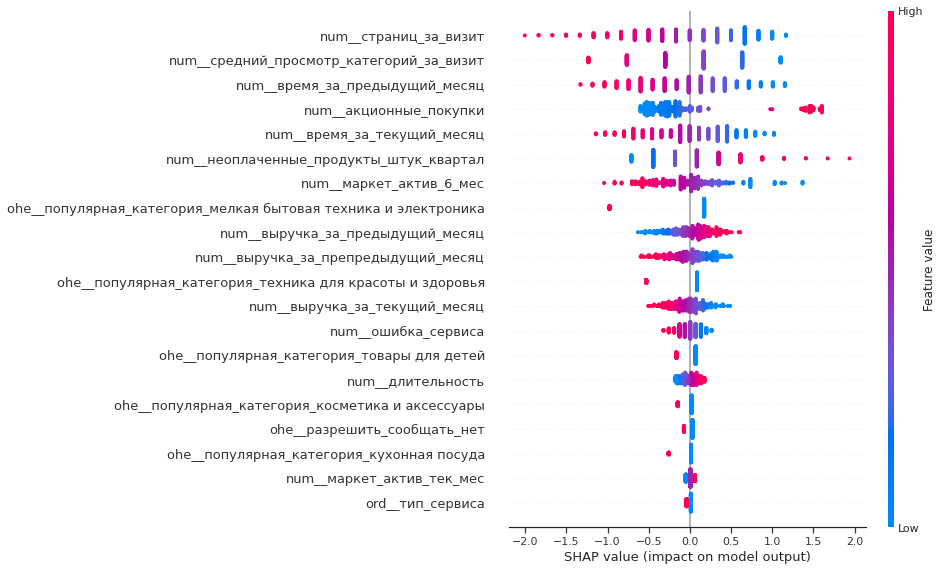

In [77]:
explainer =  shap.LinearExplainer(best_model, X_test_p)
shap_values = explainer(X_test_p)
shap.plots.beeswarm(shap_values, max_display=20) 

In [78]:
X_test_p.columns

Index(['ohe__разрешить_сообщать_нет',
       'ohe__популярная_категория_косметика и аксессуары',
       'ohe__популярная_категория_кухонная посуда',
       'ohe__популярная_категория_мелкая бытовая техника и электроника',
       'ohe__популярная_категория_техника для красоты и здоровья',
       'ohe__популярная_категория_товары для детей', 'ord__тип_сервиса',
       'num__маркет_актив_6_мес', 'num__маркет_актив_тек_мес',
       'num__длительность', 'num__акционные_покупки',
       'num__средний_просмотр_категорий_за_визит',
       'num__неоплаченные_продукты_штук_квартал', 'num__ошибка_сервиса',
       'num__страниц_за_визит', 'num__выручка_за_препредыдущий_месяц',
       'num__выручка_за_предыдущий_месяц', 'num__выручка_за_текущий_месяц',
       'num__время_за_предыдущий_месяц', 'num__время_за_текущий_месяц'],
      dtype='object')

По результатам анализа важности признаков мы можем сказать следующее:
- признаки 'ord__тип_сервиса', 'num__маркет_актив_тек_мес', 'ohe__популярная_категория_кухонная посуда', 'ohe__разрешить_сообщать_нет' мало значимы для модели;
- сильнее всего влияют на целевой признак 'num__страниц_за_визит', 'num__средний_просмотр_категорий_за_визит', 'num__время_за_предыдущий_месяц', 'num__акционные_покупки', 'num__неоплаченные_продукты_штук_квартал'.

- Среди всех признаков можно выделить два наиболее **полезных** - это **'num__акционные_покупки'** и **'num__неоплаченные_продукты_штук_квартал'**. Они оказывают **наиболее сильное влияние именно при определении класса покупательская активность "снизилась"**, то есть, можно интерпритировать это так, высокие значения этих признаков являютя предвестниками сниженной активности покупателя - "перетягивают одеяло" в эту сторону, а низкие значения этих признаков не так однозначно влияют на целевой признак.
- На **присвоение класса "прежнее_значение" покупательской активности** оказывает влияние **'num__страниц_за_визит'**. Чем больше страниц, тем лучше актинвость, тем она стабильнее, что логично.

## Сегментация покупателей

In [79]:
display(final_df.head(),
        final_df.shape)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_препредыдущий_месяц,выручка_за_предыдущий_месяц,выручка_за_текущий_месяц,время_за_предыдущий_месяц,время_за_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


(1296, 17)

In [80]:
display(money.head(),
        money.shape)

,прибыль
id,
215348,0.98
215349,4.16
215350,3.13
215351,4.87
215352,4.21


(1300, 1)

In [81]:
final_df = final_df.join(money, how='left')
final_df.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_препредыдущий_месяц,выручка_за_предыдущий_месяц,выручка_за_текущий_месяц,время_за_предыдущий_месяц,время_за_текущий_месяц,прибыль
id,,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10,4.16
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13,3.13
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13,4.87
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11,4.21
215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10,3.95


Выделим сегмент покупателей, проанализируем его и предложим, как увеличить его покупательскую активность.

Изучив результаты исследовательского, корреляционного анализа и анализа важности признаков, можно выделить два класса с наиболее выраженными отличиями - **группу клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности** и **группу клиентов с небольшой долей покупок по акции и более стабильной покупательской активностью**.

Рассмотрим график корреляционной зависимости прибыли от акционных покупок.

<AxesSubplot:xlabel='акционные_покупки', ylabel='прибыль'>

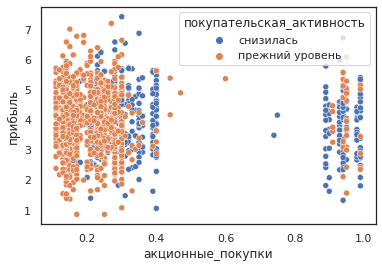

In [82]:
sns.scatterplot(data=final_df, x = "акционные_покупки", y = "прибыль", hue = "покупательская_активность")

Судя по этому графику, зависимость отсутствует.

Разделим датафрейм на два: для клиентов с высокой долей акционных покупок, согласно графику распределения это выше 0.5 от общего числа покупок, и для клиентов с низкой долей акционных покупок, это ниже 0.5, соответственно.

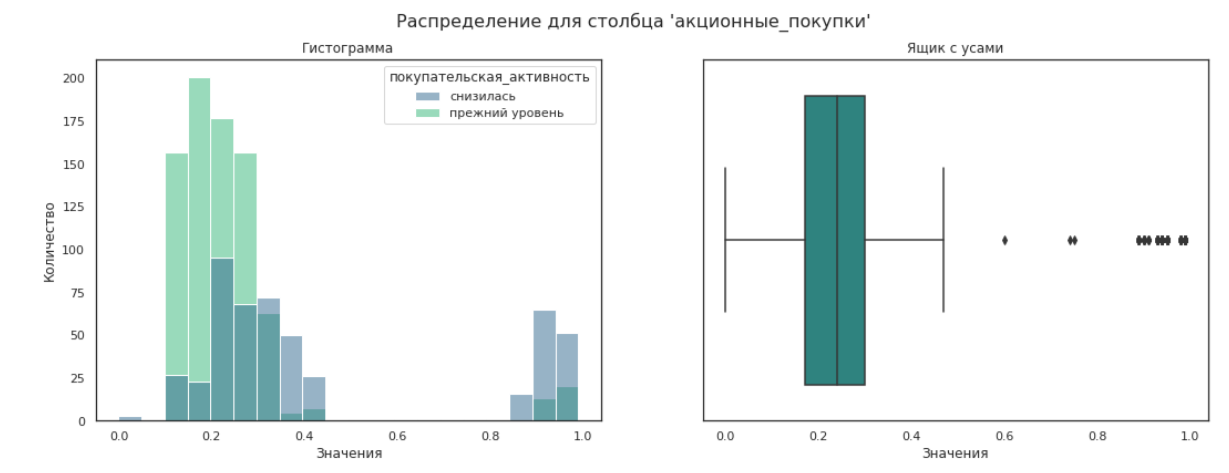

In [83]:
shares_less = final_df[final_df['акционные_покупки'] < 0.65]
shares_more = final_df[final_df['акционные_покупки'] > 0.65]
display(shares_less.shape,
       shares_more.shape)

(1130, 18)

(166, 18)

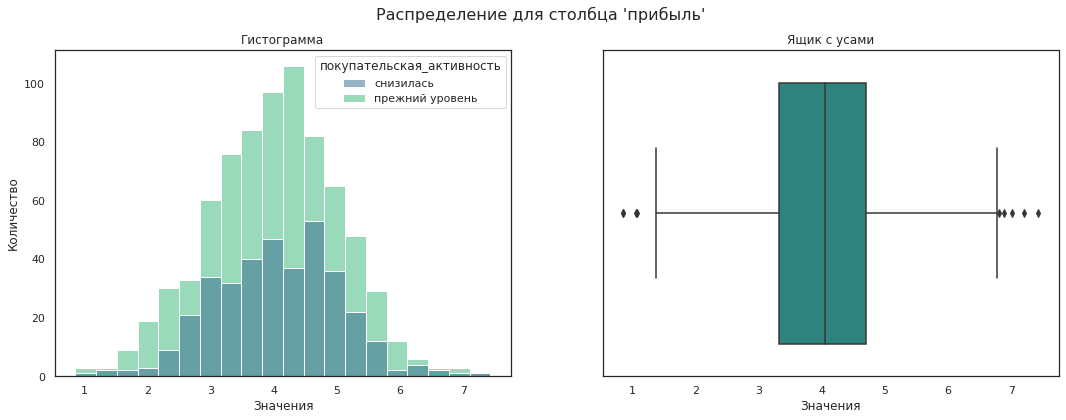

Описание данных для столбца 'прибыль':
count    1130.000000
mean        4.018009
std         1.011323
min         0.860000
25%         3.320000
50%         4.060000
75%         4.707500
max         7.430000
Name: прибыль, dtype: float64


In [84]:
research_quantitative_signs(shares_less, 'прибыль', 'покупательская_активность')

In [85]:
shares_less['покупательская_активность'].value_counts(normalize=True)

прежний уровень    0.680531
снизилась          0.319469
Name: покупательская_активность, dtype: float64

На графике распределения прибыли для категории людей, не "злоупотребляющих" акционными покупками, значительно преобладает количество клиентов, покупательская активность которых находится на прежнем (постоянном уровне). Среднее значение прибыли - 4.01

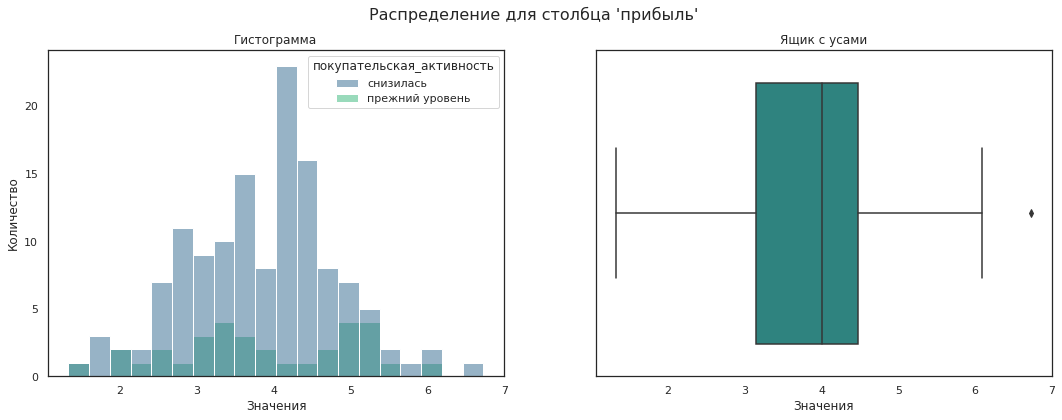

Описание данных для столбца 'прибыль':
count    166.000000
mean       3.859458
std        1.002467
min        1.330000
25%        3.147500
50%        4.000000
75%        4.470000
max        6.730000
Name: прибыль, dtype: float64


In [86]:
research_quantitative_signs(shares_more, 'прибыль', 'покупательская_активность')

In [87]:
shares_more['покупательская_активность'].value_counts(normalize=True)

снизилась          0.801205
прежний уровень    0.198795
Name: покупательская_активность, dtype: float64

На графике распределения прибыли для категории людей, совершающих в основном акционные покупки, значительно преобладает количество клиентов, покупательская активность которых снизилась. Среднее значение прибыли - 3.86. Хотя конкретно для неактивных покупателей - около 4.

Вывод, который можно сделать, опираясь на данные обоих графиков: выручки, которые в среднем приносят маркетплейсу клиенты каждого выделенного сегмента, приблизительно равны между собой. В сегменте с долей акционных покупок меньшей 0.5 от общего числа покупок преобладает количество клиентов c прежней активностью, а сегмент с долей акционных покупок большей 0.5 на 80% состоит из клиентов с пониженной покупательской активностью. 

Также проверим гипотезу о том, что средняя прибыль от покупателей с долей акционных покупок более 0.65 меньше, чем от клиентов с долей акционных покупок менее 0.65.

- Нулевая гипотеза: средние значения прибыли с клиентов каждого из двух сегментов равны.
- Альтернативная гипотеза: среднее значение прибыли с клиентов с долей акционных покупок более 0.65 меньше, чем среднее значение прибыли с клиентов с долей акционных покупок менее 0.65.

In [88]:
alpha = 0.05

shares_less = shares_less.sample(n=307)
results = st.ttest_ind(shares_more['прибыль'], shares_less['прибыль'], alternative='less')

display(f'p-значение: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение: 0.05267229264579727'

'Не получилось отвергнуть нулевую гипотезу'

Что это значит? Цель нашего проекта - вернуть прежнюю покупательскую активность клиентов. Мы рассмотрели два сегмента покупателей - тех, доля акционных покупок которых меньше 0.65, и тех, у кого она больше. Средние прибыли покупателей каждого из сегментов равны между собой. В первом сегменте среди клиентов практически не наблюдается снижение покупательской активности, в то время как во втором такие покупатели преобладают. Это значит, что акции для этих клиентов играют значимую роль и "провоцируют" их на покупки. Поэтому нам необходимо делать таким покупателям больше персонализированных предложений - скидок и специальных предложений, так как от этого напрямую зависит их покупательская активность и прибыль маркетплейса - выручка от них составляет столько же, сколько и от стабильно покупающих клиентов.


Выясним какие категории товаров наиболее интресны таким покупателям.

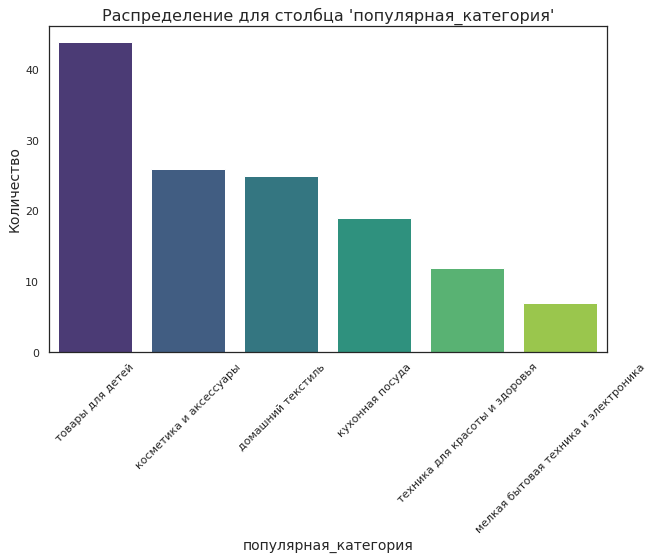

In [89]:
research_categorical_signs(shares_more[shares_more['покупательская_активность'] == 'снизилась'], 'популярная_категория')

Наиболее популярна категория "товары для детей", а также "косметика и аксессуары" и "домашний текстиль". Именно на эти категории товаров рекомендуется проводить акции, делать специальные предложении, скидки.

## Общий вывод

Перед нами стояла задача увеличить покупательскую активность клиентов интернет-магазина «В один клик» путем персонализации предложений постоянным клиентам. 

В ходе выполнения работы была выполнена предобработка данных: изучена общая информация о каждом из трех датасетов, устранены полные и неполные явные и неявные дубликаты, стиль написания столбцов и данных был приведен к единому формату.

Затем был проведен исследовательский анализ, в ходе которого были ликвидированы выбросы и артефакты, а также изучено распределение данных. После этого последовал корреляционный анализ данных. По итогу были сделаны следующие выводы:
- `Маркет_актив_6_мес` — в среднем за последние 6 месяцев на каждого покупателя приходилось около 4 маркетинговых коммуникаций компании. На графике распределения, который носит нормальный характер, можно заметить некоторое количество выбросов - это покупатели, с которыми происходило меньше двух рекламных взаимодействий. Все они относятся к категории клиентов, активность которых снизилась. Возможно, это люди, которые лишь  зарегистрировались на маркетплейсе, получили какое-то “приветственное” предложение или акцию, а затем пропали или поставили запрет на сообщения от интернет-магазина, возможно сам **интернет-магазин перестал проводить маркетинговые коммуникации с клиентами, что привело к снижению их покупательской активности**.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце так же в среднем равно 4. В целом происходит от 3 до 5 взаимодействий с клиентом каждой категории - с пониженной и нормальной активностью.
- `Длительность` — распределение значений данного признака имеет нормальный характер. В среднем клиентская база состоит из людей, зарегистрировавшихся около 600 дней назад. Можно предположить, что в тот период проходила какая-то активная маркетинговая кампания, которая принесла наибольший приток клиентов. Значения данного признака варьируются от 110 до 1079 дней с момента регистрации. Выбросы отсутствуют.
- `Акционные_покупки` — **данный признак имеет нормальное распределение однако состоит из двух пиков. Первый характеризует покупателей, у которых доля покупок по акции от общего числа покупок за последние 6 месяцев в среднем составляет около 0.24, то есть это люди, которые не гонятся только за скидками/акциями, а просто покупают необходимые им вещи. Скорее всего они являются постоянными покупателями, которые периодически могут воспользоваться выгодными предложениями. Второй пик - это группа людей, доля акционных покупок которых составляет от 0.9 до 0.99. Это клиенты, которые в основном “заглядывают” только на акции, и судя по гистограмме, именно среди них преобладают клиенты с пониженной покупательской активностью: нет акций - нет активнсти**.
- `Средний_просмотр_категорий_за_визит` — признак имеет нормальное распределение. В среднем среднее количество просматриваемых покупателем c прежним уровнем активности категорий за визит в течение последнего месяца равно 3, а покупатели со сниженным уровнем активности просматривают в среденем около 2-х категорий. Обычно покупатели просматривают от 1 до 6 категорий (всего на маркетплейсе представлено 6 категорий товаров).
- `Неоплаченные_продукты_штук_квартал` — распределение данного признака также носит нормальный характер. В среднем общее число неоплаченных товаров в корзине за последние 3 месяца равно 3. **Имеются выбросы - покупатели с более чем 8 неоплаченными товарами, и все они с пониженной активностью. Видимо, находятся в ожидании скидок и специальных предложений**.
- `Ошибка_сервиса` — признак имеет нормальное распределение. В среднем покупатели сталкивались с 4 сервисными ошибками во время посещения сайта.
- `Страниц_за_визит` — распределение значений данного признака нормальное. Среднее количество страниц, просматриваемых покупатель с прежней активностью за один визит на сайт за последние 3 месяца равно 8, а с пониженной - около 4-5 страниц за визит. Больше 20 страниц покупатели обычно не просматривали.
- `Тип сервиса` — наблюдений с уровнем сервиса «премиум» более чем 2 раза меньше наблюдений с уровнем «стандарт».
- `Разрешить сообщать` — более 900 покупателей дали свое согласие на получение сообщений от магазина, и менее 400 - запретили рассылку.
- `Популярная_категория` — **самая популярная категория товаров** у покупателя за последние 6 месяцев - **товары для детей**. Самая непопулярная - кухонная посуда.

Целевой признак "Покупательская активность" **среднюю зависимость** от признаков **'время_за_предыдущий_месяц', 'время_за_текущий_месяц', 'выручка_за_препредыдущий_месяц', 'неоплаченные_продукты_штук_квартал', 'средний_просмотр_категорий_за_визит', 'акционные_покупки', 'маркет_актив_6_мес'** и **высокую зависимость** от признака **'страниц_за_визит'**. Категория покупателей со сниженной покупательской активностью была проанализирована более подробно и вот какие выводы можно сделать:
- время, проведенное на сайте интернета магазина в текущем месяце, имеет среднюю зависимость от времени, проведенном на сайте интернета магазина в предыдущем месяце, и от выручки за препредыдущий месяц
Коэффициент корреляции положительный, и так как мы имеем дело с категорией покупателей, покупательская активность которых снизилась - это означает, что чем меньше пользователи проводят времени на сайте в предыдущем месяце и чем ниже была выручка в прошлом месяце, тем скорее всего будет меньше времени, проведенного на сайте в текущем месяце. То есть можно сказать, что два перечисленных фактора влияют на интерес покупателя.
- 'время_за_предыдущий_месяц' имеет среднюю зависимость от 'выручка_за_препредыдущий_месяц' и от 'страниц_за_визит'
Ситуация аналогичная предыдущей. Уменьшение выручки за предыдущий месяц и страниц за визит влеет за собой уменьшение времени, проводимого в процессе скролинга маркетплейса, то есть потерю интереса.
- 'выручка_за_препредыдущий_месяц' имеет среднюю зависимость от 'страниц_за_визит'
Вполне логично, что чем меньше страниц за визит было просмотрено, тем меньше было желание покупателя что-то найти и купить, а значит и меньше выручка.
- и высокую зависимость признака 'выручка_за_текущий_месяц' от 'выручка_за_предыдущий_месяц'

Далее была построена линейная модель, которая предсказывает вероятность снижения покупательской активности клиента в следующие три месяца. Она была выбрана путем перебора нескольких вариаций моделей, гиперпараметров, а также способов кодировки данных. По итогу анализа важности признаков было выявлено следующее:
- Среди всех признаков можно выделить два наиболее **полезных** - это **'num__акционные_покупки'** и **'num__неоплаченные_продукты_штук_квартал'**. Они оказывают **наиболее сильное влияние именно при определении класса покупательская активность "снизилась"**, то есть, можно интерпритировать это так, высокие значения этих признаков являютя предвестниками сниженной активности покупателя - "перетягивают одеяло" в эту сторону, а низкие значения этих признаков не так однозначно влияют на целевой признак.

**Вся проделанная работа привела нас к варианту сегментации покупателей на два основных класса с наиболее выраженными отличиями - группу клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности и группу клиентов с небольшой долей покупок по акции и более стабильной покупательской активностью.** Средние прибыли покупателей каждого из сегментов равны между собой. В первом сегменте среди клиентов практически не наблюдается снижение покупательской активности, в то время как во втором такие покупатели преобладают. Это значит, что акции для этих клиентов играют значимую роль и "провоцируют" их на покупки. Поэтому нам необходимо сделать им персонализированные предложения, так как от этого напрямую зависит их покупательская активность и прибыль маркетплейса - выручка от них составляет столько же, сколько и от стабильно покупающих клиентов. Делать персонализированные предложения стоит на следующие категории товаров:
- товары для детей
- косметика и аксессуары
- домашний текстиль